# A simple linear-regression

### Dataset : data.csv
### Problem statement: Linear regression with one variable : $y=m*x + b$
In this part of this exercise, you will implement linear regression with one variable to predict profits.

**Purpose of this exercise:**
- Understand the concept of Cost Function
- Understand the concept of Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import data from the data.csv and plot the dataset


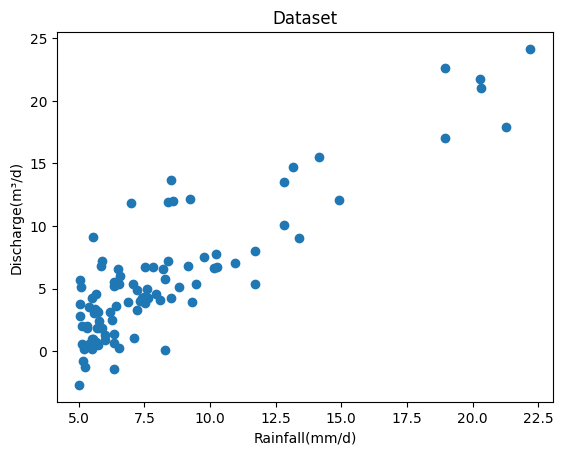

In [3]:
points = pd.read_csv('data.csv')
points = np.array(points)
#Extract columns
x = points[:,0]
y = points[:,1]

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Rainfall(mm/d)')
plt.ylabel('Discharge(m³/d)')
plt.title('Dataset')
plt.show()

In [4]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_m = 0 
num_iterations = 300

## Cost function:
Cost function quantifies the error between predicted and expected values and presents that error in the form of a single real number. 

- Depending on the problem, cost function can be formed in many different ways. 
- The purpose of cost function is to be either minimized or maximized. 
- For algorithms relying on gradient descent to optimize model parameters, every function has to be differentiable.

$J(\beta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\beta(x^{(i)})-y^{(i)})^2$

In [5]:
# Cost function : squared errors
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

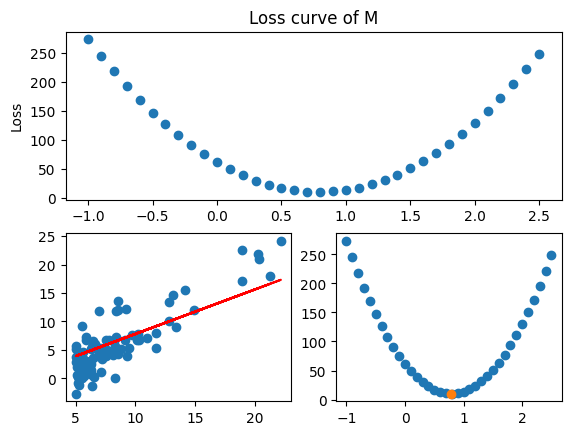

In [73]:
m_list = np.arange(-1 , 2.6 , 0.1)
cost_value = np.zeros(m_list.shape[0])
idx = 0
for m in m_list:    
    cost_value[idx] = compute_cost(0 , m , points)
    idx = idx + 1
    
m_value = 0.78 # try your m value here!
pred = m_value * x + 0    

fig = plt.figure()
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0 , :])
ax2 = fig.add_subplot(gs[1 , 0])
ax3 = fig.add_subplot(gs[1 , 1])

ax1.scatter(m_list , cost_value)
ax1.set_ylabel('Loss')
ax1.set_title('Loss curve of M')

ax2.plot(x , pred , 'r')
ax2.scatter(x , y)

ax3.scatter(m_list , cost_value)
ax3.scatter(m_value , compute_cost(0 , m_value , points))
plt.show()

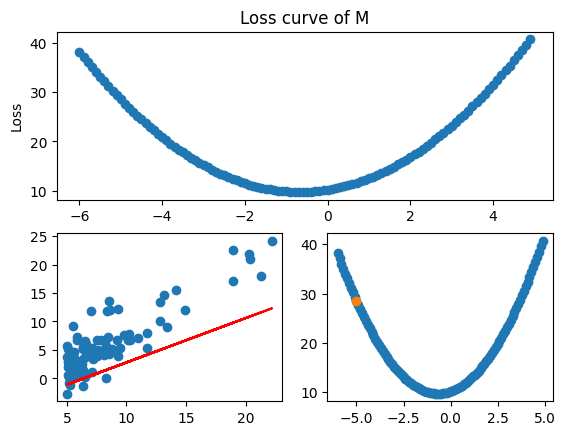

In [78]:
b_list = np.arange(-6 , 5 , 0.1)
cost_value = np.zeros(b_list.shape[0])
idx_b = 0
for b in b_list:    
    cost_value[idx_b] = compute_cost(b , 0.78 , points)
    idx_b = idx_b + 1

    
b_value = -5 # try your b value here!
pred = 0.78 * x + b_value    

fig = plt.figure()
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0 , :])
ax2 = fig.add_subplot(gs[1 , 0])
ax3 = fig.add_subplot(gs[1 , 1])

ax1.scatter(b_list , cost_value)
ax1.set_ylabel('Loss')
ax1.set_title('Loss curve of M')

ax2.plot(x , pred , 'r')
ax2.scatter(x , y)

ax3.scatter(b_list , cost_value)
ax3.scatter(b_value , compute_cost(b_value , 0.78 , points))
plt.show()

## Gradient Descent functions:
The objective of linear regression is to minimize the cost function:

$J(\beta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\beta(x^{(i)})-y^{(i)})^2$
    
where the hypothesis $h_\beta(x)$ is given by the linear model: $h_\beta(x) = m*x+b$

Recall that the parameters of your model are the $\beta_j$ values. These are the values you will adjust to minimize cost $J(\beta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update:

$\beta_j := \beta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\beta(x^{(i)})-y^{(i)})x_j^{(i)}$ (simultaneously update $\beta_j$ for all j).

In [36]:
# Gradient Descent functions
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, points, learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

In [37]:
# Run gradient_descent_runner() to get optimized parameters b and m
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.0317485178421148
Optimized m: 0.7832296577898581
Minimized cost: 10.206510651765559


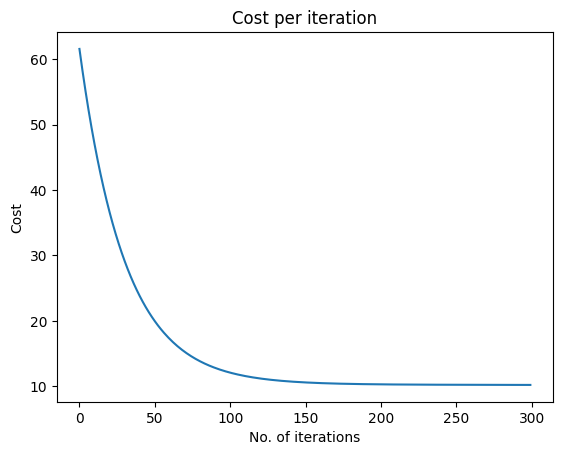

In [38]:
# Cost per iterations
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

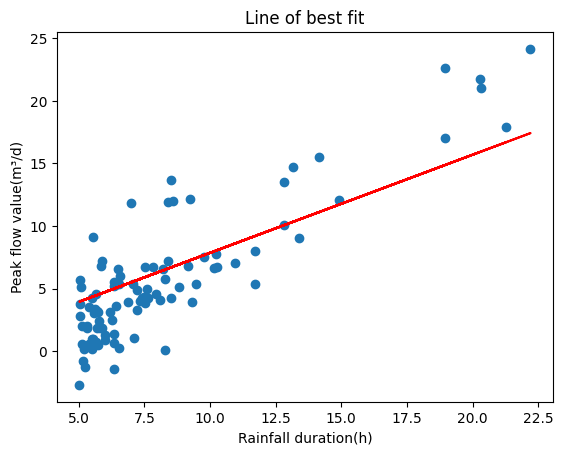

In [39]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Rainfall duration(h)')
plt.ylabel('Peak flow value(m³/d)')
plt.title('Line of best fit')
plt.show()